# Team_1 NDSA B4
# Competition - Supervised Learning

In [1]:
from platform import python_version

In [2]:
python_version()

'3.8.8'

### Domain : Tourism
### Data : tour_package.csv
#### Source : Kaggle Datasets

### Context:
<ul>
<li><b>Visit With Us</b> tourism company wants to establish a viable business model to expand its customer base

<li>Currently there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Over 18% of customers purchased a product from the available packages according to the data from the last year

<li>However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

<li>The company is now planning to launch a new product <b>Wellness Tourism Package</b>. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

### Objective:
<ul>


<li>To Predict customers more likely to purchase the newly introduced package
</ul>


### Customer details:
<ol>
<li>CustomerID: Unique customer ID
<li>ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
<li>Age: Age of customer
<li>TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
<li>CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
<li>Occupation: Occupation of customer
<li>Gender: Gender of customer
<li>NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
<li>PreferredPropertyStar: Preferred hotel property rating by customer
<li>MaritalStatus: Marital status of customer
<li>NumberOfTrips: Average number of trips in a year by customer
<li>Passport: The customer has a passport or not (0: No, 1: Yes)
<li>OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
<li>NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
<li>Designation: Designation of the customer in the current organization
<li>MonthlyIncome: Gross monthly income of the customer   
    </ol>
<b>Customer interaction data:</b>
    <ol>
<li>PitchSatisfactionScore: Sales pitch satisfaction score
<li>ProductPitched: Product pitched by the salesperson
<li>NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
<li>DurationOfPitch: Duration of the pitch by a salesperson to the customer  </ol>  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# M1 :  Data collection

In [5]:
tour_df = pd.read_csv('tour_package.csv')

In [6]:
tour_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
tour_df.shape

(4888, 20)

There are 4888 rows and 20 columns in the data set.

In [8]:
tour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
tour_df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


# M2: Preprocessing

### M2.1 Check categorical cols

In [10]:
categories =['Gender','TypeofContact','Occupation','ProductPitched','MaritalStatus','Designation']
for i in categories:
    print(i)
    print(tour_df[i].value_counts())

Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


### In gender col Female and Fe Male are same values so replace them

In [11]:
tour_df['Gender'] = tour_df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [12]:
tour_df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

### M2.2 Missing values

In [13]:
tour_df.isna().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

<ul>
<li>There are lot of missing values in the data set
<li>Highest number of missing values are in DurationOfPitch(251),MonthlyIncome(233),Age(226),NumberOfTrips(140)

We will fill the missing values by different categories

### a.Categorical


### Type of contact

In [14]:
#type of contact
tour_df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [15]:
toc = tour_df['TypeofContact'].mode()
tour_df['TypeofContact'] = tour_df['TypeofContact'].fillna(toc[0])

Since type of contact is categorical we filled the null values with mode

### b.Numerical
### b.1) Discrete

### Number of trips

Since number of trips depends on maritalstatus we will group the data by marital status and then take the median to fill null values

In [16]:
print(tour_df.groupby('MaritalStatus')['NumberOfTrips'].median())

MaritalStatus
Divorced     3.0
Married      3.0
Single       2.0
Unmarried    3.0
Name: NumberOfTrips, dtype: float64


In [17]:
tour_df["NumberOfTrips"] = tour_df.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median()))

In [18]:
tour_df['NumberOfTrips'].isna().sum()

0

### NumberOfChildrenVisiting 

In [19]:
tour_df['NumberOfChildrenVisiting'].value_counts()

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64

We fill number of children column by median

In [20]:
noc = tour_df['NumberOfChildrenVisiting'].median()
tour_df['NumberOfChildrenVisiting'] = tour_df['NumberOfChildrenVisiting'].fillna(noc)

In [21]:
tour_df['NumberOfChildrenVisiting'].isna().sum()

0

### NumberOfFollowups

Number of follow ups depends on Product pitched so we group the data by later and then fill null values by corresponding median

In [22]:
print(tour_df.groupby('ProductPitched')['NumberOfFollowups'].median())

ProductPitched
Basic           4.0
Deluxe          4.0
King            4.0
Standard        4.0
Super Deluxe    4.0
Name: NumberOfFollowups, dtype: float64


In [23]:
nof=tour_df['NumberOfFollowups'].median()
tour_df["NumberOfFollowups"] = tour_df['NumberOfFollowups'].fillna(nof)

In [24]:
tour_df['NumberOfFollowups'].isna().sum()

0

### Preferred property star

Preferredproperty star depends on Product pitched so we group the data by later and then fill null values by corresponding median

In [25]:
print(tour_df.groupby(["ProductPitched"])["PreferredPropertyStar"].median())

ProductPitched
Basic           3.0
Deluxe          3.0
King            3.0
Standard        3.0
Super Deluxe    3.0
Name: PreferredPropertyStar, dtype: float64


In [26]:
tour_df['PreferredPropertyStar']=tour_df.groupby(["ProductPitched"])["PreferredPropertyStar"].apply(
    lambda x:x.fillna(x.median()))

In [27]:
tour_df['PreferredPropertyStar'].isna().sum()

0

### b.2)Continous value type

We will check the histograms for these columns to understand the skewness and then decide how to fill them

<Figure size 864x576 with 0 Axes>

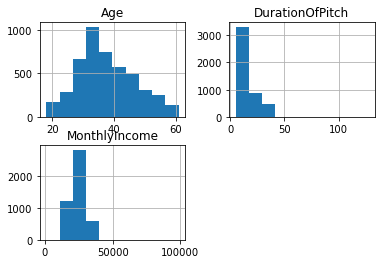

In [28]:
plt.figure(figsize=(12,8))
ax=tour_df[['Age','DurationOfPitch','MonthlyIncome']].hist();
plt.show()

In [29]:
tour_df[['Age','DurationOfPitch','MonthlyIncome']].skew(axis=0)

Age                0.382989
DurationOfPitch    1.752037
MonthlyIncome      1.949160
dtype: float64

All the three are positively skewed hence we take median values after necessary grouping

### Age

In [30]:
tour_df['Age'].describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

 We will fill the age column by median age based on designation and gender

In [31]:

tour_df.groupby(["Designation", "Gender"])["Age"].median()
tour_df['Age'] = tour_df.groupby(["Designation", "Gender"])["Age"].apply(lambda x:x.fillna(x.median()))

In [32]:
tour_df['Age'].isna().sum()

0

### Duration of pitch

We will fill duration of pitch based on Product pitched and number of follow ups

In [33]:
tour_df.groupby(['ProductPitched','NumberOfFollowups'])["DurationOfPitch"].median()
tour_df['DurationOfPitch'] = tour_df.groupby(["ProductPitched", "NumberOfFollowups"])["DurationOfPitch"].apply(
                                    lambda x:x.fillna(x.median()))

In [34]:
tour_df['DurationOfPitch'].isna().sum()

0

### Monthly Income

We will fill monthly income based on occupation, designation and gender, since they are dependent

In [35]:
tour_df.groupby(['Occupation','Designation','Gender'])['MonthlyIncome'].median()
tour_df["MonthlyIncome"]=tour_df.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

In [36]:
tour_df["MonthlyIncome"].isna().sum()

0

### Recheck missing values

In [37]:
tour_df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#### All null values are filled
<ul>
<li> We have looked on all columns with null values
<li> Then we have filled them appropriately
<li> Now there are no null values in the dataset   

## M2.3 Outliers

### Check the percentage of outliers in each numerical column

In [38]:
Q1 = tour_df.quantile(0.25)             
Q3 = tour_df.quantile(0.75)

IQR = Q3 - Q1                          

lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

In [39]:
((tour_df.select_dtypes(include=['float64','int64'])<lower) | 
 (tour_df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(tour_df)*100

CustomerID                   0.000000
ProdTaken                   18.821604
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              2.291326
NumberOfPersonVisiting       0.061375
NumberOfFollowups            6.382979
PreferredPropertyStar        0.000000
NumberOfTrips                2.229951
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.528642
dtype: float64

<ul>
<li>The columns 'DurationOfPitch','MonthlyIncome','NumberOfFollowups','NumberOfTrips' have high percentage of outliers.
<li>Select the columns with high percentage of outliers and plot them.
 <li>   Here we do not consider ProdTaken column because it is our target  

In [40]:
outlier_col= ['DurationOfPitch','MonthlyIncome','NumberOfFollowups',
                'NumberOfTrips']

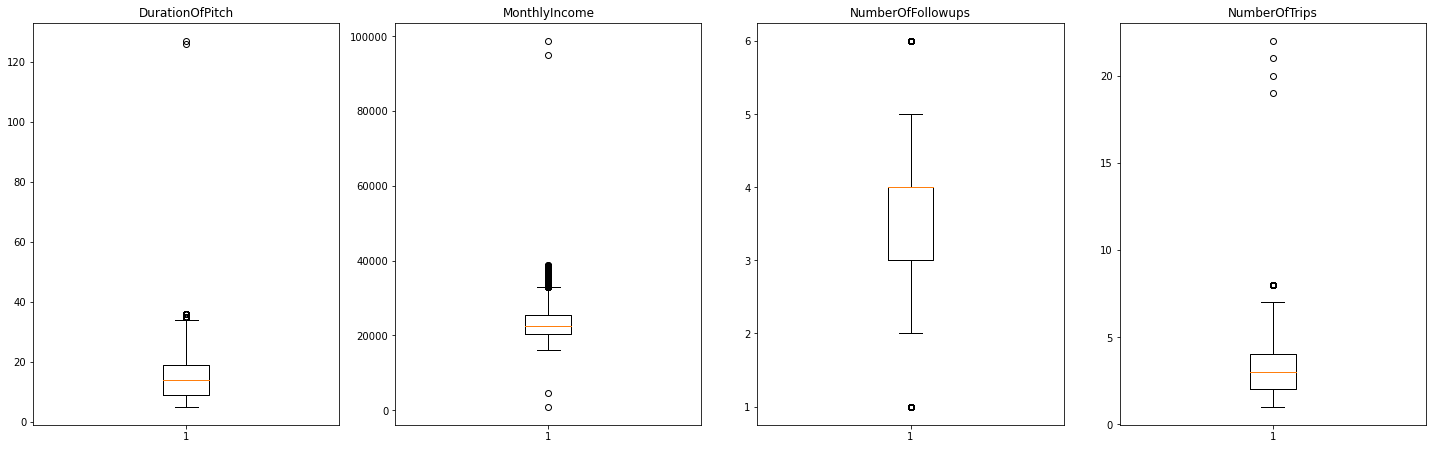

In [41]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(outlier_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(tour_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Outlier Treatment
<ul>
<li>While checking each columns we understand that these outliers are completely possible to occur    
<li> Hence we are neither removing or replacing the outliers
<li> Also outliers doesnot affect ml models such as DecisionTree    

## M2.4 Encoding

We will first split the data into features(X) and target(y) as encoding shouldn't affect target column

In [42]:

X = tour_df.drop(['ProdTaken','CustomerID'],axis=1)
y=tour_df['ProdTaken']


#### Encoding method
<ul>
   <li>Since there are many categorical columns we will do <b>One-Hot Encoding</b>
   <li>Other columns like City tier and preferred property star are ordinal data.Hence we do not do label encoding here    

In [43]:
#onehot encoding whole X data
X = pd.get_dummies(X)

In [44]:
X.shape

(4888, 34)

In [45]:
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,1,0,0,0,1,0,0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,1,0,0,0,0,0,1,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,1,0,0,1,0,0,0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,1,0,0,0,0,1,0,0,0
4,32.0,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,1,0,0,0,0,1,0,0,0


<ul>
    <li> After encoding we are left with 34 columns (previously we had 20)
        

### Preprocessing Inference
<ol>
<li><b>Missing values:</b>We have treated the missing values by filling them appropriately
<li><b>Outliers :</b>We have viwed the outliers and decided not to remove or replace them
<li><b>Encoding: </b> We have done One-hot encoding after dividing the data into features and target   

# M3: EDA

## M3.1 Univariate Analysis

### 1. Numerical Data

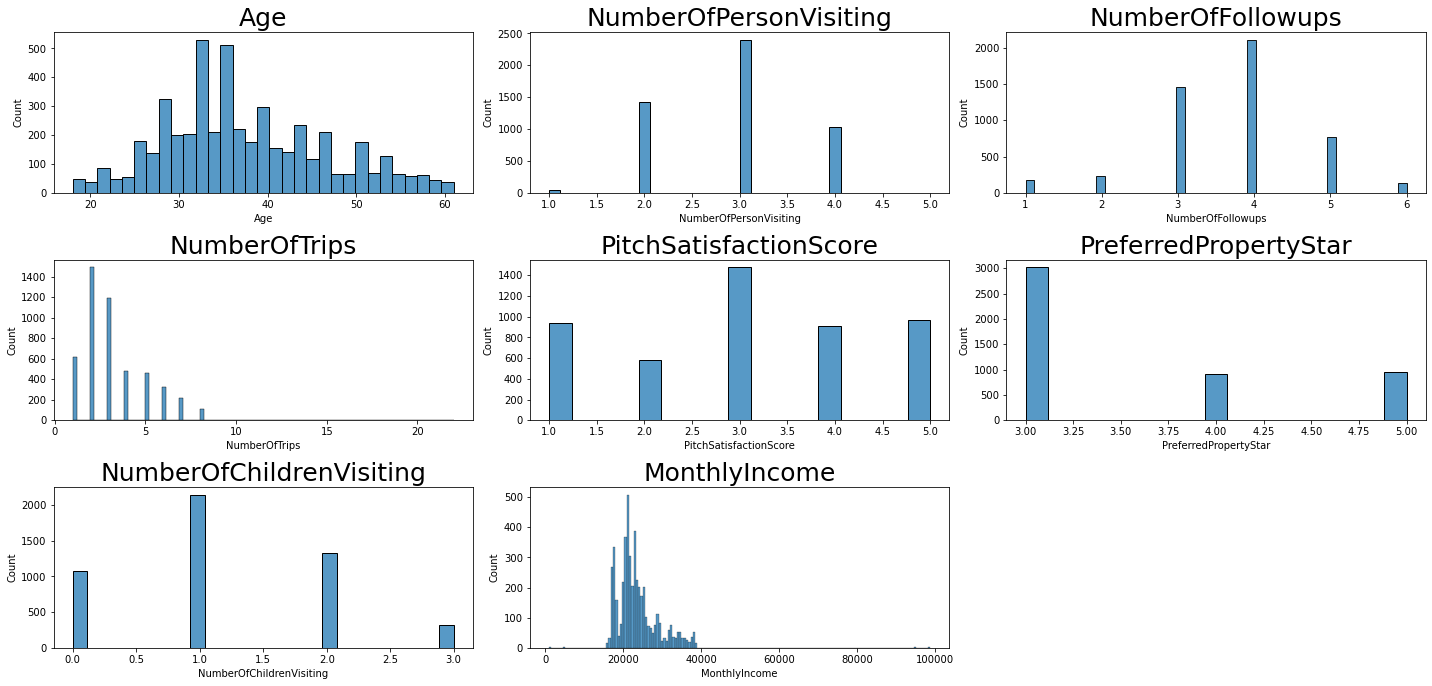

In [46]:
num_col=['Age','NumberOfPersonVisiting','NumberOfFollowups',
                   'NumberOfTrips','PitchSatisfactionScore','PreferredPropertyStar','NumberOfChildrenVisiting','MonthlyIncome']
plt.figure(figsize=(20,25))
for i in range(len(num_col)):
 plt.subplot(8,3,i+1)
 sns.histplot(tour_df[num_col[i]],kde=False)
 plt.tight_layout()
 plt.title(num_col[i],fontsize=25)
plt.show()

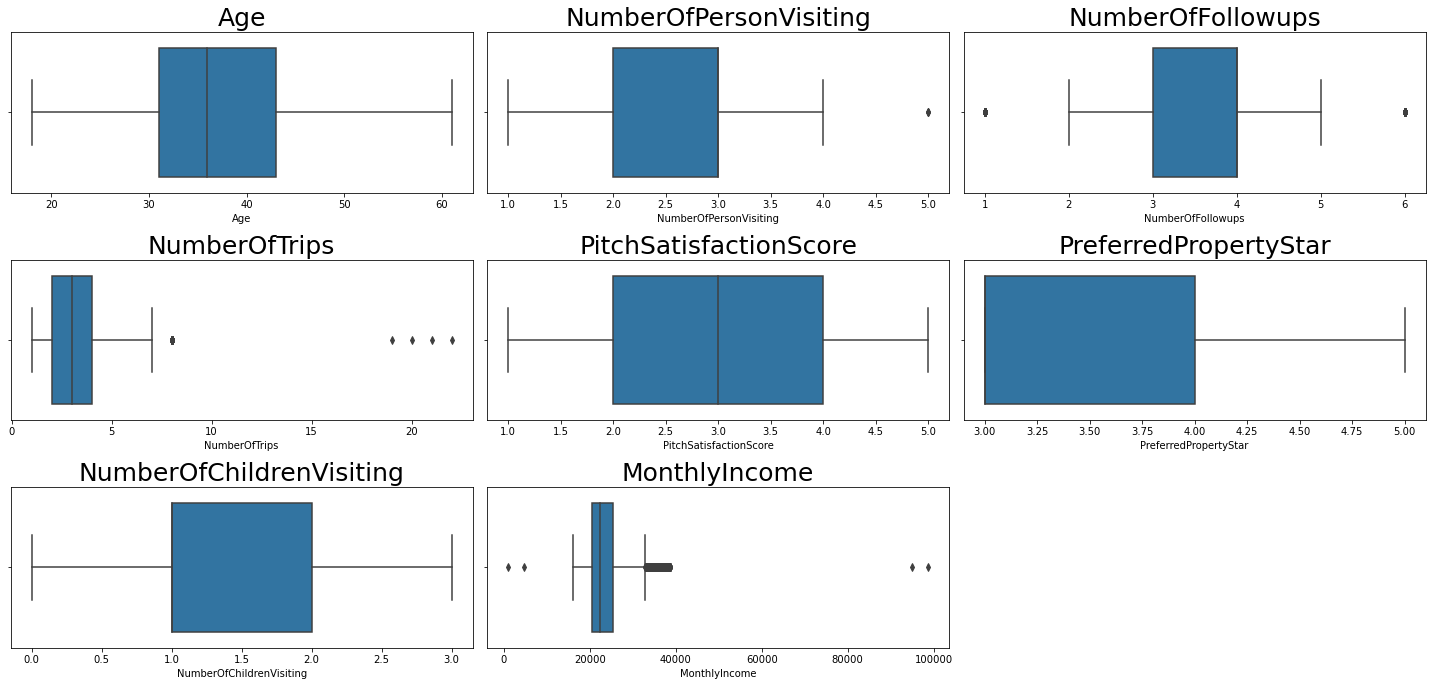

In [47]:
plt.figure(figsize=(20,25))
for i in range(len(num_col)):
 plt.subplot(8,3,i+1)
 sns.boxplot(tour_df[num_col[i]])
 plt.tight_layout()
 plt.title(num_col[i],fontsize=25)
plt.show()

### Observation(Numerical):
<ul>
<li>Age is normally distributed and have no outliers
<li>Usually there are 3 number of persons visiting with an outlier as 5
<li> The most occured number of follow ups are 4 with outliers as 1 and 6
<li> Most number of trips are between 1 and 5 with a few outliers around 20
<li> Most given pitch satisfication score is 3. This have no outliers
<li> Most preferred property star is 3 with no outlier
<li> Most frequent number of children visiting per trip is 1 with no outlier
<li><b> Monthly income is right skewed with lot of outliers.</b>

### 2.Categorical

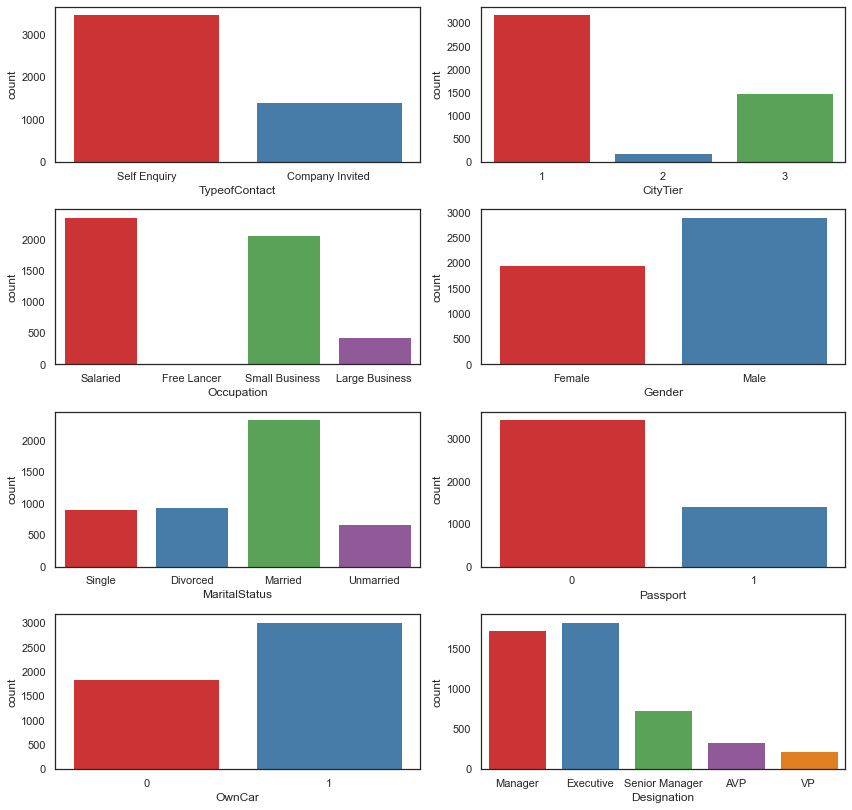

In [48]:
plt.figure(figsize=(12,25))

sns.set_theme(style="white") 
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'MaritalStatus', 
        'Passport',
        'OwnCar',  
        'Designation',]
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = tour_df[variable].value_counts(ascending=False).index   
                     
                     sns.set_palette('Set1')
                     ax=sns.countplot(x=tour_df[variable], data=tour_df )
                     plt.tight_layout()   
                        

### Observation (Categorical):
<ul>

<li> Most people are from city tier 1
<li> A large portion are either salaried or have small business
<li> There are around 48% female and the rest male
<li> Most people travelling are married.
<li> A large portion owns car
<li> A large portion of working people are either manager or executive

## M3.2 Bivariate Analysis

### Heatmap

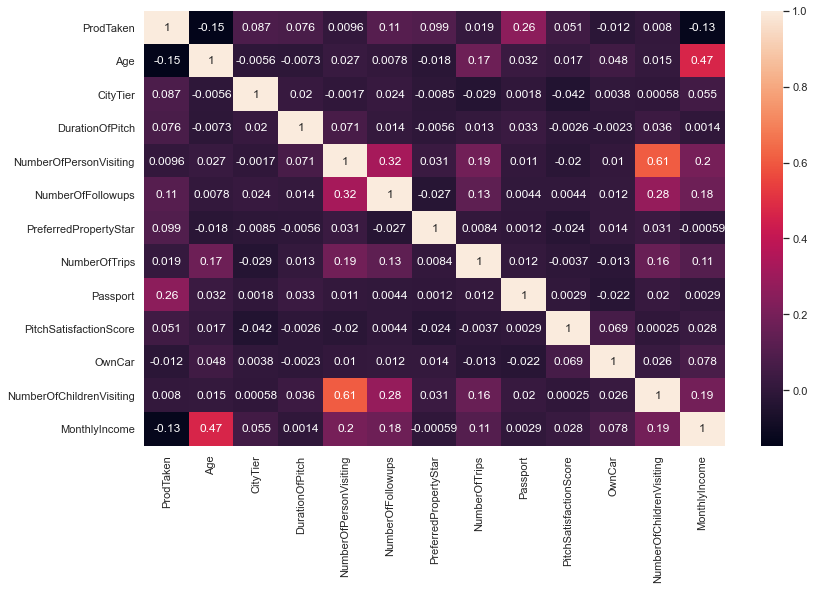

In [49]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(13,8))
data = tour_df.drop(['CustomerID'],axis=1)
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Observation:
<ul>
<li>Monthlyincome and Age has weak correlation
<li>Number of children visiting and number of person vsiting has correlation as expected.
<li>Numberof follow up and number of person vsiting has very weak correlation.

### Numerical columns vs Product Taken

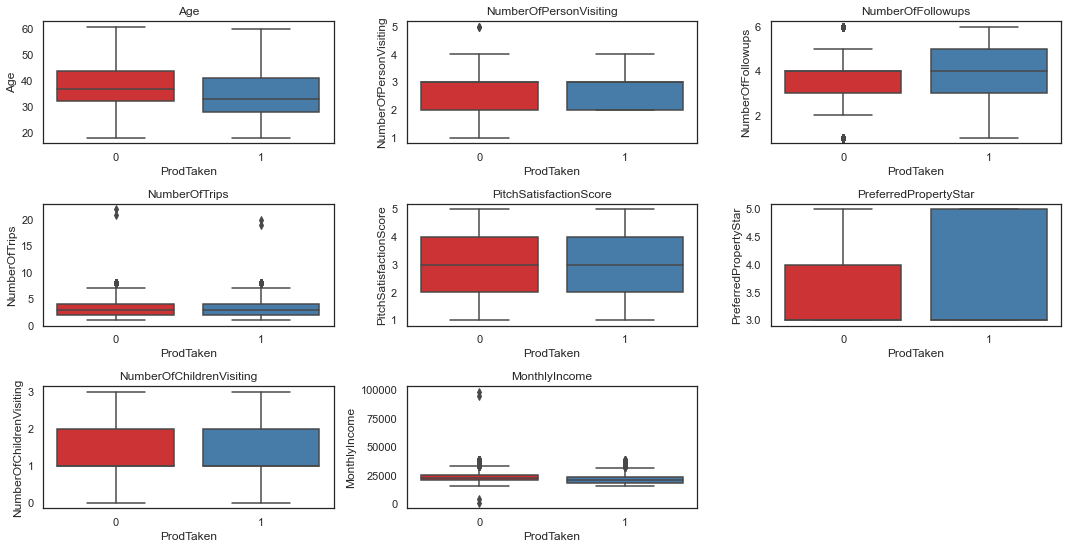

In [50]:
num_col=['Age','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips',
         'PitchSatisfactionScore','PreferredPropertyStar','NumberOfChildrenVisiting','MonthlyIncome']

plt.figure(figsize=(15,20))
for i, variable in enumerate(num_col):
                     plt.subplot(8,3,i+1)
                     sns.boxplot(tour_df["ProdTaken"],tour_df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Observation:
<ul>
<li>Customers who purchased the product are mostly in age range of 28 -35
<li>Number of trips has some outliers like 17 -20.
<li>Monthly income has extreme outliers.Customers who purchased product are in earning on average 18000-23000 monthly

# M4: Modelling

### Import all necessary libraries

In [51]:
#         train_test_split
from sklearn.model_selection import train_test_split
#         different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#         metrics for comparison
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,plot_confusion_matrix,classification_report

#### Train test splitting of data by taking 20 % of data as test set

In [52]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [53]:
print('X_train shape:',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape: (3910, 34)
X_test shape :  (978, 34)
y_train shape:  (3910,)
y_test shape : (978,)


### This is a classification problem hence now we will apply each of the following classification models to the data set and find which one is the best .

### Logisitc

In [54]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_lr = log.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred_lr))
acc_lr=accuracy_score(y_test,y_pred_lr)
f1_lr=f1_score(y_test,y_pred_lr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       787
           1       0.67      0.28      0.40       191

    accuracy                           0.83       978
   macro avg       0.76      0.62      0.65       978
weighted avg       0.81      0.83      0.80       978



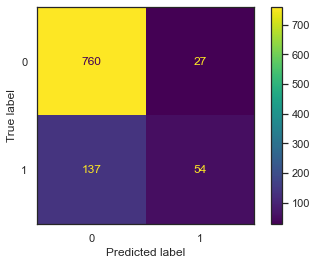

In [56]:
plot_confusion_matrix(log,X_test,y_test)

### KNN classifier


In [57]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train, y_train)
    y_pred_k = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

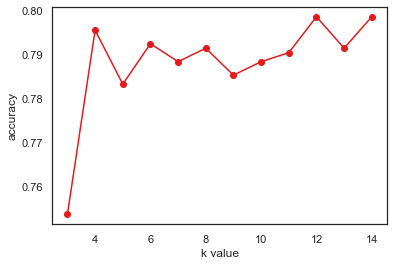

In [58]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [59]:
knn = KNeighborsClassifier(n_neighbors=12, metric='minkowski')
knn.fit(X_train, y_train)
y_pred_k = knn.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred_k))
acc_k=accuracy_score(y_test,y_pred_k)
f1_k=f1_score(y_test,y_pred_k)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       787
           1       0.36      0.04      0.08       191

    accuracy                           0.80       978
   macro avg       0.59      0.51      0.48       978
weighted avg       0.72      0.80      0.73       978



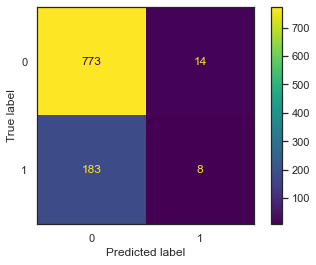

In [61]:
plot_confusion_matrix(knn,X_test,y_test)

### Decision tree

In [62]:

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred_dt))
acc_dt=accuracy_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       787
           1       0.77      0.79      0.78       191

    accuracy                           0.91       978
   macro avg       0.86      0.87      0.86       978
weighted avg       0.91      0.91      0.91       978



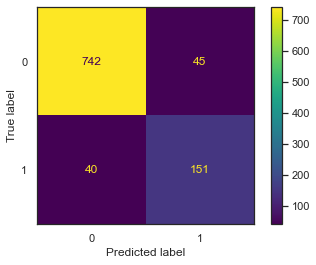

In [64]:
plot_confusion_matrix(dt,X_test,y_test)

### Model performance evaluation:
Comparing f1_score and accuracy of these three models and deciding the best fit

In [65]:
comp = pd.DataFrame({'Logistic':[acc_lr,f1_lr],
                    'KNN':[acc_k,f1_k],
                    'DecisionTree':[acc_dt,f1_dt]},index=['Accuracy','F1_score'])
comp.transpose()

,Accuracy,F1_score
Logistic,0.832311,0.397059
KNN,0.798569,0.075117
DecisionTree,0.913088,0.780362


### Modelling Inference-1
<ul>
<li>Among these three, <b>Decision Tree performs best</b> with 91% accuracy and 0.78 f1_score
<li>The worst performance is by KNN having only 0.07 f1_score , we could understand it from the confusion matrix plot as it fails to predict postitives

### Ensemble Models

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Randomforest

In [67]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred_rfc))
acc_rfc=accuracy_score(y_test,y_pred_rfc)
f1_rfc=f1_score(y_test,y_pred_rfc)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       787
           1       0.95      0.57      0.71       191

    accuracy                           0.91       978
   macro avg       0.93      0.78      0.83       978
weighted avg       0.91      0.91      0.90       978



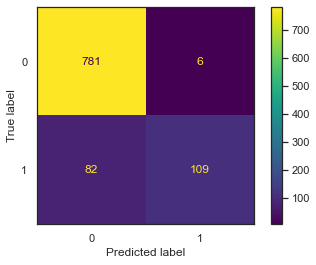

In [69]:
plot_confusion_matrix(rfc,X_test,y_test)

In [70]:
pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)*100

MonthlyIncome                    11.566735
Age                              11.222655
DurationOfPitch                   9.894691
Passport                          8.226485
NumberOfTrips                     6.172094
PitchSatisfactionScore            5.920203
NumberOfFollowups                 5.114682
PreferredPropertyStar             4.273502
CityTier                          3.626433
NumberOfChildrenVisiting          2.872966
NumberOfPersonVisiting            2.719756
MaritalStatus_Single              2.173123
Designation_Executive             2.132670
OwnCar                            2.097303
ProductPitched_Basic              2.078728
Occupation_Small Business         1.877610
TypeofContact_Company Invited     1.772373
Gender_Female                     1.768672
Gender_Male                       1.766003
Occupation_Salaried               1.757203
TypeofContact_Self Enquiry        1.735029
MaritalStatus_Married             1.604639
MaritalStatus_Unmarried           1.392887
Occupation_

### Gradient boosting

In [71]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred_gbc))
acc_gbc=accuracy_score(y_test,y_pred_gbc)
f1_gbc=f1_score(y_test,y_pred_gbc)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       787
           1       0.78      0.38      0.51       191

    accuracy                           0.86       978
   macro avg       0.83      0.68      0.72       978
weighted avg       0.85      0.86      0.84       978



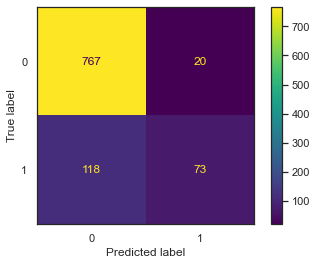

In [73]:
plot_confusion_matrix(gbc,X_test,y_test)

### XGBoost

In [74]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

[09:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
print(classification_report(y_test,y_pred_xgb))
acc_xgb=accuracy_score(y_test,y_pred_xgb)
f1_xgb=f1_score(y_test,y_pred_xgb)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       787
           1       0.94      0.65      0.77       191

    accuracy                           0.92       978
   macro avg       0.93      0.82      0.86       978
weighted avg       0.93      0.92      0.92       978



In [76]:
f1_score(y_test,y_pred_xgb)

0.7716049382716049

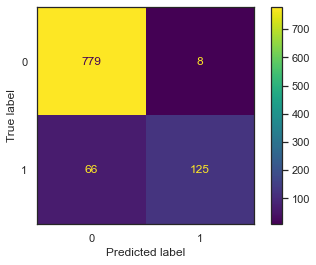

In [77]:
plot_confusion_matrix(xgb,X_test,y_test)

### Model performance evaluation:
Comparing all ensembling models along with Decisiontree using accuracy and f1_score

In [78]:
comp2 = pd.DataFrame({'DecisionTree':[acc_dt,f1_dt],
                     'RandomForest':[acc_rfc,f1_rfc],
                    'GradientBoost':[acc_gbc,f1_gbc],
                    'XGBooster':[acc_xgb,f1_xgb]
                    },index=['Accuracy','F1_Score'])
comp2.transpose()

,Accuracy,F1_Score
DecisionTree,0.913088,0.780362
RandomForest,0.910020,0.712418
GradientBoost,0.858896,0.514085
XGBooster,0.924335,0.771605


### Modelling Inference 2:
<ul>
    <li> <b>XGBooster</b> have the highest accuracy(92%)
    <li> While <b>DecisionTree</b> has the highest f1_score (0.78)
    <li> And we can see all the four models have good accuacy score
    <li>But while comparing f1 score Gradient boost shows very low value    

## Final modelling Inference
If we read both the inferences we could finalize four models that are good fit for this particular classification problem. They are:
<ol>
<b><li> Decision Tree
<li>XGBooster
<li>RandomForest
<li>Gradient Boost

# M5:Model Fine Tuning 

### 1. Random Forest hyper parameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [81]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

In [82]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [83]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [84]:
grid.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 200,
 'oob_score': False}

In [85]:
predictions = grid.predict(X_test)

In [86]:
print(classification_report(y_test,predictions))
acc_rfc2 = accuracy_score(y_test,predictions)
f1_rfc2=f1_score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       787
           1       0.98      0.65      0.78       191

    accuracy                           0.93       978
   macro avg       0.95      0.83      0.87       978
weighted avg       0.93      0.93      0.92       978



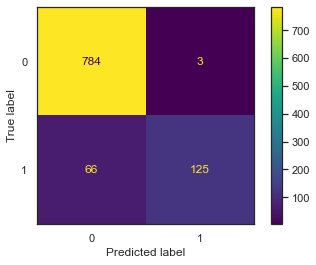

In [87]:
plot_confusion_matrix(grid,X_test,y_test)

In [88]:
### Comparing accuracy and f1_score 

In [89]:
randfor = pd.DataFrame({
                     'BeforeTuning':[acc_rfc,f1_rfc],
                    'AfterTuning':[acc_rfc2,f1_rfc2]
                    },index=['Accuracy','F1_Score'])
randfor.transpose()

,Accuracy,F1_Score
BeforeTuning,0.910020,0.712418
AfterTuning,0.929448,0.783699


### Hyper parameter tuning have increased the accuracy as well as f1_score for Random Forest

### Gradient Boost Hyper parameter tuning

In [90]:

param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [91]:
gb_model = GradientBoostingClassifier()

In [92]:
grid = GridSearchCV(gb_model,param_grid)

In [93]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [94]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [95]:
predictions = grid.predict(X_test)

In [96]:
print(classification_report(y_test,predictions))
acc_gbc2 = accuracy_score(y_test,predictions)
f1_gbc2=f1_score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       787
           1       0.93      0.63      0.75       191

    accuracy                           0.92       978
   macro avg       0.92      0.81      0.85       978
weighted avg       0.92      0.92      0.91       978



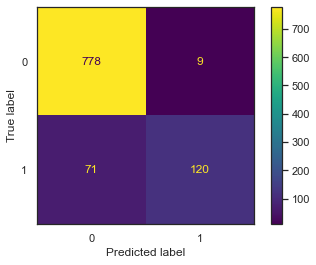

In [97]:
plot_confusion_matrix(grid,X_test,y_test)

In [98]:
gradboost = pd.DataFrame({
                     'BeforeTuning':[acc_gbc,f1_gbc],
                    'AfterTuning':[acc_gbc2,f1_gbc2]
                    },index=['Accuracy','F1_Score'])
gradboost.transpose()

,Accuracy,F1_Score
BeforeTuning,0.858896,0.514085
AfterTuning,0.918200,0.750000


### Hyper parameter tuning have increased the accuracy as well as f1_score very mcuh for Gradient Boost

## Comparing both

In [99]:
comp3 = pd.DataFrame({
                     'RandomForest':[acc_rfc2,f1_rfc2],
                    'GradientBoost':[acc_gbc2,f1_gbc2],
                    
                    },index=['Accuracy','F1_Score'])
comp3.transpose()

,Accuracy,F1_Score
RandomForest,0.929448,0.783699
GradientBoost,0.918200,0.750000


#### After tuning both have same accuracy and f1_score

In [100]:
rfc2=RandomForestClassifier(bootstrap=False,max_features= 4,n_estimators=100,oob_score= False)
rfc2.fit(X_train,y_train)
pd.Series(rfc2.feature_importances_, index=X.columns).sort_values(ascending=False)*100

MonthlyIncome                    11.304904
Age                              11.201232
DurationOfPitch                  10.131460
Passport                          8.209809
NumberOfTrips                     6.325345
PitchSatisfactionScore            6.137741
NumberOfFollowups                 4.896717
PreferredPropertyStar             4.442247
CityTier                          3.789744
NumberOfChildrenVisiting          2.719829
NumberOfPersonVisiting            2.635359
MaritalStatus_Single              2.308620
OwnCar                            2.145978
Occupation_Small Business         2.123475
Occupation_Salaried               1.963692
Designation_Executive             1.940418
Gender_Female                     1.826632
TypeofContact_Company Invited     1.787384
Gender_Male                       1.747013
ProductPitched_Basic              1.725692
TypeofContact_Self Enquiry        1.712821
MaritalStatus_Married             1.489173
Occupation_Large Business         1.407997
MaritalStat

# Final inference 
<ul>
    <li>Hyper parameter tuning have great effect on both Random Forest and Gradient  Boosting 
     <li> The best parameters for knowing the puchasing behaviour are :<b>  Age,
MonthlyIncome,
DurationOfPitch,
Passport,
NumberOfTrips, and
PitchSatisfactionScore

### Visit With Us tourism company can now continue working on the  Wellness Tourism Package by knowing  which customers more likely to purchase the newly introduced package

# END